## Analyzing Parisian Real Estate Evolution

**Importing libraries**

In [495]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Getting French inflation data**

In [40]:
inflation = pd.read_csv("inflation.csv")

In [41]:
inflation = inflation[inflation['Country Name'] == 'France']

In [42]:
inflation = inflation.T

In [43]:
inflation.columns = ["Inflation"]

In [44]:
inflation = inflation.iloc[4:]

In [45]:
inflation

,Inflation
1960,4.13994
1961,2.40046
1962,5.33128
1963,4.99915
1964,3.21119
...,...
2016,0.183335
2017,1.03228
2018,1.85082
2019,1.10825


**Plotting inflation evolution in France**

Text(0.5, 1.0, 'France Inflation')

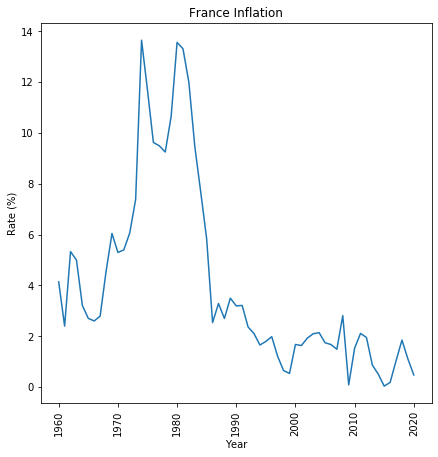

In [53]:
fig, ax = plt.subplots(figsize=(7,7), facecolor='w')
plt.xticks(range(0,2020, 10), rotation = 90)
plt.plot(inflation.index, inflation['Inflation'])
plt.xlabel("Year")
plt.ylabel("Rate (%)")
plt.title("France Inflation")

**Getting historical Real State Data**

In [140]:
real_state_data = pd.read_csv("Historique_des_Prix.csv")

In [141]:
real_state_data.head()

,Time,1er,2e,3e,4e,5e,6e,7e,8e,9e,...,11e,12e,13e,14e,15e,16e,17e,18e,19e,20e
0,T3 2021,"12,630","12,160","12,730","13,290","12,870","14,540","14,230","11,620","11,210",...,"10,550","10,160","9,560","10,520","10,530","11,390","11,020","10,110","9,410","9,250"
1,T2 2021,"13,800","12,170","12,520","13,450","12,980","14,070","13,830","11,870","10,900",...,"10,480","9,990","9,380","10,480","10,540","11,060","10,820","10,180","9,290","9,210"
2,T1 2021,"13,200","12,020","12,340","13,360","12,220","14,440","13,510","11,800","11,040",...,"10,530","9,860","9,430","10,440","10,400","11,260","10,900","10,140","9,170","9,200"
3,T4 2020,"12,840","12,630","12,560","13,600","13,480","14,460","13,470","11,950","11,290",...,"10,690","9,920","9,620","10,570","10,560","11,400","10,810","10,300","9,210","9,320"
4,T3 2020,"13,960","12,370","12,630","13,580","12,800","14,430","13,970","11,520","11,010",...,"10,800","10,120","9,590","10,670","10,690","11,440","11,030","10,230","9,060","9,470"


In [142]:
number_of_columns = real_state_data.shape[1]
number_of_lines = real_state_data.shape[0]

for i in range(0, number_of_lines):
    for j in range(1, number_of_columns):
        real_state_data.iloc[i,j] = str(real_state_data.iloc[i,j]).replace(",", ".")
        real_state_data.iloc[i,j] = float(real_state_data.iloc[i,j])

real_state_data = real_state_data.iloc[::-1, :] 
    
        


In [143]:
real_state_data.head(5)

,Time,1er,2e,3e,4e,5e,6e,7e,8e,9e,...,11e,12e,13e,14e,15e,16e,17e,18e,19e,20e
103,T4 1995,3.76,2.22,2.67,3.17,3.24,3.86,3.83,3.52,2.2,...,2.2,2.24,2.36,2.59,2.73,3.16,2.5,1.9,1.93,1.97
102,T1 1996,3.08,2.47,2.63,3.03,3.13,3.61,3.34,3.56,2.24,...,2.11,2.16,2.43,2.52,2.63,3.05,2.41,1.93,1.89,1.95
101,T2 1996,2.72,2.44,2.43,3.15,3.09,3.43,3.37,3.15,2.21,...,2.08,2.21,2.33,2.67,2.59,3,2.41,1.94,1.89,1.93
100,T3 1996,3.22,2.39,2.57,3.07,3.26,3.48,3.33,3.41,2.12,...,2.06,2.13,2.33,2.59,2.63,2.94,2.37,1.89,1.83,1.88
99,T4 1996,2.96,2.32,2.51,2.96,3.06,3.37,3.25,3.23,2.16,...,2.04,2.11,2.36,2.6,2.59,2.94,2.41,1.83,1.83,1.93


**Plotting the evolution of prices for each neighborhood**

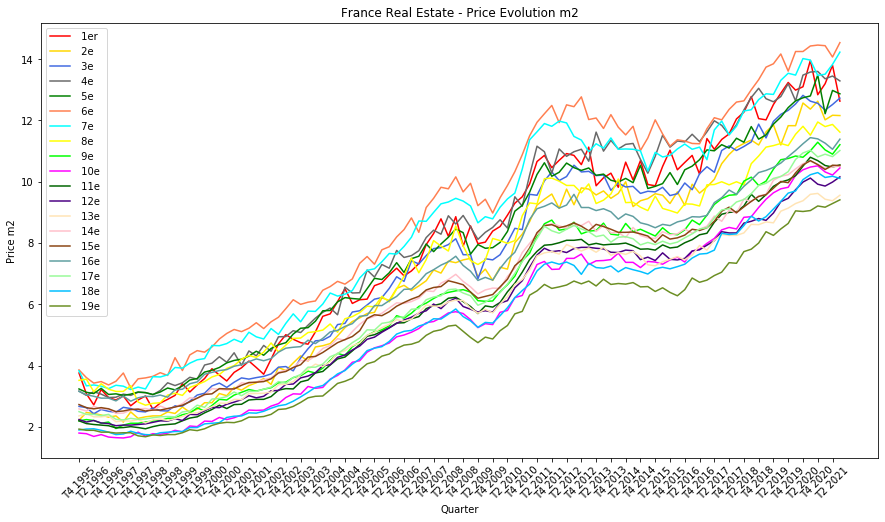

In [459]:
colors = ['teal', 'red', 'gold', 'royalblue', 'dimgrey', 'green', 'coral', 'cyan', 'yellow', 'lime', 'magenta', 'darkgreen', 'indigo', 'moccasin', 'pink', 'saddlebrown', 'cadetblue', 'palegreen', 'deepskyblue', 'olivedrab', 'goldenrod']
plt.figure(figsize=(15,8))

number_of_labels = len(np.array(real_state_data.iloc[:,0].values))
labels = np.array(real_state_data.iloc[:,0].values)
plt.xticks(np.arange(1,number_of_labels + 1), labels[::2], rotation= 45) # set divisor
plt.locator_params(axis='x', nbins=len(np.arange(1,number_of_labels + 1))/2)

for j in range (1, number_of_columns):
    plt.plot(np.arange(1,number_of_labels + 1), real_state_data.iloc[:,j].values, label = real_state_data.columns[j], c = colors[j])

plt.xlabel("Quarter")
plt.ylabel("Price m2")
plt.title("France Real Estate - Price Evolution m2")
plt.legend(loc = 4, prop={'size': 7})    
plt.legend()
plt.show()

**Exponential Moving Average - 5 years for all neighborhoods**

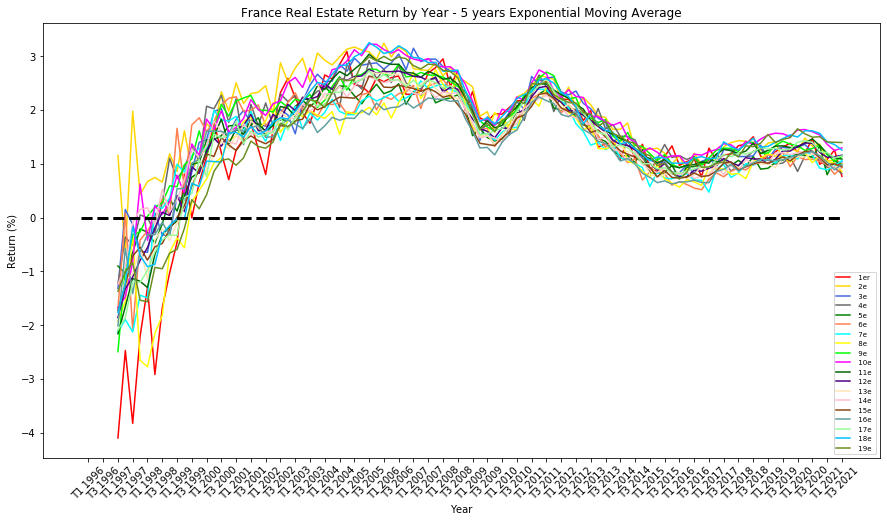

In [460]:
colors = ['teal', 'red', 'gold', 'royalblue', 'dimgrey', 'green', 'coral', 'cyan', 'yellow', 'lime', 'magenta', 'darkgreen', 'indigo', 'moccasin', 'pink', 'saddlebrown', 'cadetblue', 'palegreen', 'deepskyblue', 'olivedrab', 'goldenrod']


plt.figure(figsize=(15,8))

number_of_labels = len(np.array(real_state_data.iloc[1:,0].values))
labels = np.array(real_state_data.iloc[1:,0].values)
plt.xticks(np.arange(1,number_of_labels + 1), labels[::2], rotation= 45) # set divisor
plt.locator_params(axis='x', nbins=len(np.arange(1,number_of_labels + 1))/2)



for j in range (1, number_of_columns):
    plt.plot(np.arange(1,number_of_labels + 1), pd.DataFrame(real_state_data.iloc[:,j].values).pct_change()[1:].ewm(min_periods = 5, alpha = 0.05).mean()*100, label = real_state_data.columns[j], c = colors[j])

plt.plot(np.arange(0,number_of_labels + 1), np.zeros(number_of_labels + 1), c = 'black',  linestyle='dashed', linewidth = 3.0)
plt.xlabel("Year")
plt.ylabel("Return (%)")
plt.title("France Real Estate Return by Year - 5 years Exponential Moving Average")
plt.legend(loc = 4, prop={'size': 7})
plt.show()

**Exponential Moving Average - 5 years - Mean for all neighborhoods**

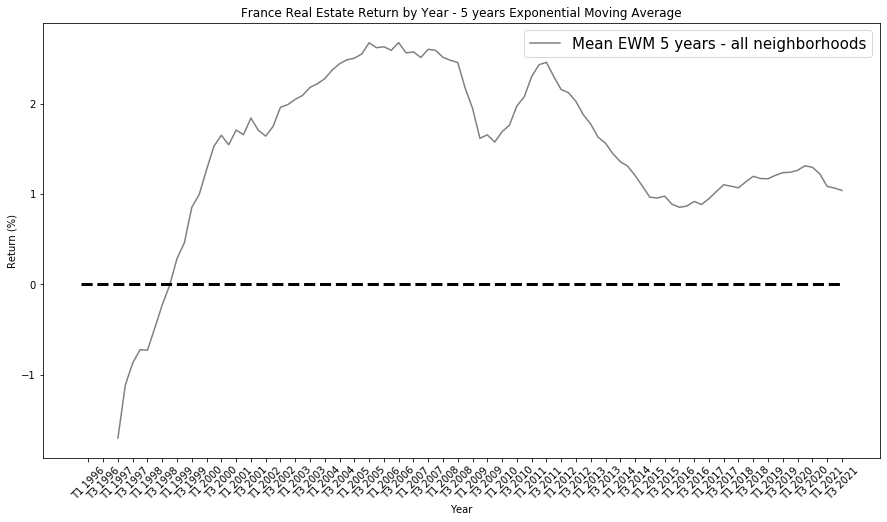

In [461]:
colors = ['teal', 'red', 'gold', 'royalblue', 'dimgrey', 'green', 'coral', 'cyan', 'yellow', 'lime', 'magenta', 'darkgreen', 'indigo', 'moccasin', 'pink', 'saddlebrown', 'cadetblue', 'palegreen', 'deepskyblue', 'olivedrab', 'goldenrod']


plt.figure(figsize=(15,8))

number_of_labels = len(np.array(real_state_data.iloc[1:,0].values))
labels = np.array(real_state_data.iloc[1:,0].values)
plt.xticks(np.arange(1,number_of_labels + 1), labels[::2], rotation= 45) # set divisor
plt.locator_params(axis='x', nbins=len(np.arange(1,number_of_labels + 1))/2)

returns_per_neighborhood = []

for j in range (1, number_of_columns):
    returns_per_neighborhood.append(pd.DataFrame(real_state_data.iloc[:,j].values).pct_change()[1:].ewm(min_periods = 5, alpha = 0.05).mean()*100)

returns_per_neighborhood_array = np.array([np.array(x) for x in returns_per_neighborhood])
plt.plot(np.arange(1,number_of_labels + 1), returns_per_neighborhood_array.mean(axis = 0), c = 'grey', label = "Mean EWM 5 years - all neighborhoods")


plt.plot(np.arange(0,number_of_labels + 1), np.zeros(number_of_labels + 1), c = 'black',  linestyle='dashed', linewidth = 3.0)
plt.xlabel("Year")
plt.ylabel("Return (%)")
plt.title("France Real Estate Return by Year - 5 years Exponential Moving Average")
plt.legend(loc = 1, prop={'size': 15})
plt.show()

**What about cumulative returns ?**

In [484]:
cumulative_returns = pd.DataFrame(real_state_data.iloc[:,1:].pct_change()[1:]) + 1 

In [485]:
cumulative_returns = cumulative_returns.cumprod(axis = 0)
cumulative_returns = cumulative_returns - 1

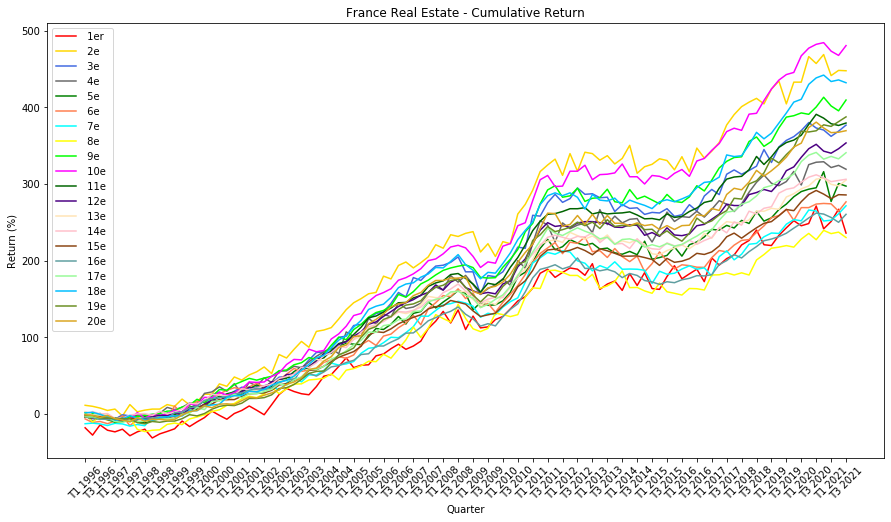

In [486]:
colors = ['red', 'gold', 'royalblue', 'dimgrey', 'green', 'coral', 'cyan', 'yellow', 'lime', 'magenta', 'darkgreen', 'indigo', 'moccasin', 'pink', 'saddlebrown', 'cadetblue', 'palegreen', 'deepskyblue', 'olivedrab', 'goldenrod']
plt.figure(figsize=(15,8))

number_of_columns = cumulative_returns.shape[1]

number_of_labels = len(np.array(real_state_data.iloc[1:,0].values))
labels = np.array(real_state_data.iloc[1:,0].values)
plt.xticks(np.arange(1,number_of_labels + 1), labels[::2], rotation= 45) # set divisor
plt.locator_params(axis = 'x', nbins=len(np.arange(1,number_of_labels + 1))/2)

for j in range (0, number_of_columns):
    plt.plot(np.arange(1,number_of_labels + 1), (cumulative_returns.iloc[:,j].values)*100, label = cumulative_returns.columns[j], c = colors[j])

plt.xlabel("Quarter")
plt.ylabel("Return (%)")
plt.title("France Real Estate - Cumulative Return")
plt.legend(loc = 4, prop={'size': 7})    
plt.legend()
plt.show()